In [1]:
data_file_in = "data/recording_62.wav" # <--- CHANGE THIS!!
five = 5 # <--- AND THIS IF NEEDED!

In [2]:
from receiver import receiver
import matplotlib.pyplot as plt

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
Sample rate (wav) =  48000


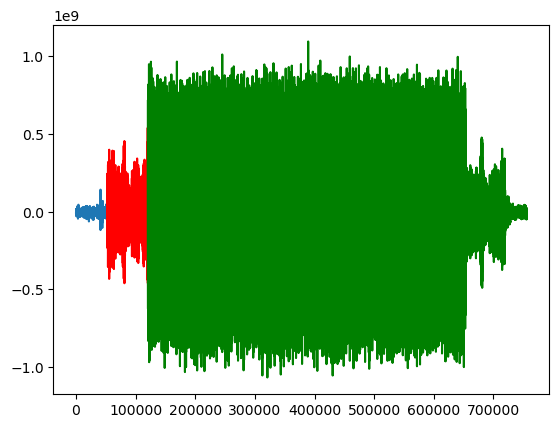

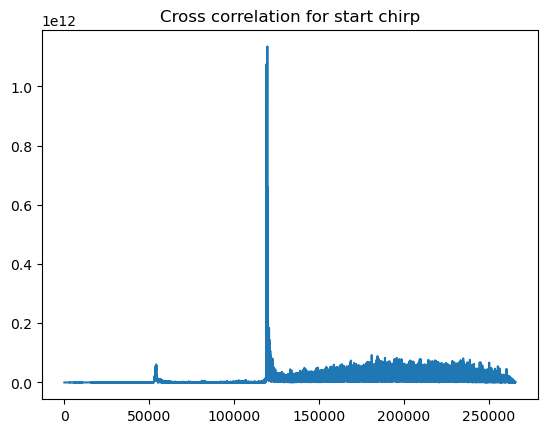

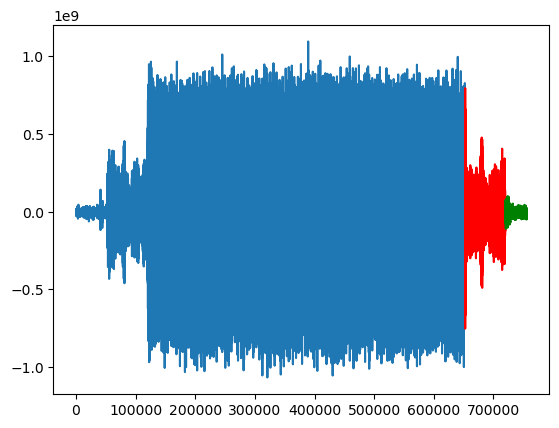

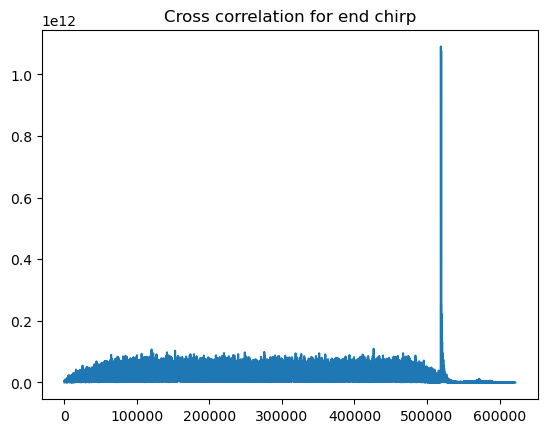

In [3]:
r = receiver()

# entire_data = np.loadtxt('data/benson_testing1.csv', delimiter = ",", dtype = "float")

entire_data = r.read_wav(data_file_in)

### FIND CROSS CORRELATIONS (start and end chirps)

start_index, cross_correlation = r.find_start_index(entire_data)

plt.plot(cross_correlation)
plt.title("Cross correlation for start chirp")
plt.show()

end_index, cross_correlation = r.find_start_index(entire_data, position = "end")

plt.plot(cross_correlation)
plt.title("Cross correlation for end chirp")
plt.show()


In [4]:
### FIND LENGTH AND SEPERATE DATA BLOCK

end_index = end_index - r.ofdm_prefix_size # ???
data_index = r.find_data_index(entire_data, start_index)
data_length = end_index - data_index

print("Data Length:", data_length)

num_symbols = data_length // (r.ofdm_symbol_size + r.ofdm_prefix_size) # Floor division may mean that we loose some data at the end?
data_block = entire_data[data_index : data_index + (num_symbols) * (r.ofdm_symbol_size + r.ofdm_prefix_size)]

r.bits = int(num_symbols * r.c.K)
print("Bits:", r.bits)

data = r.data_block_processing(data_block, known_blocks = five)

print("Data: ", data[0:100])
print(r.decode_text(data)[0:100])

data_without_header = r.extract_header(data)
r.save_decoded_file(data_without_header, r.bits)

Data Length: 532045
Bits: 66744
Len of Data_block: 527360
Number of OFDM Symbols: 103
[ 1.00000000e+00+0.00000000e+00j -1.99268629e+09-2.90430711e+09j
  4.99058880e+09-5.28441905e+09j ... -6.02310175e+09-6.68885104e+08j
  4.99058880e+09+5.28441905e+09j -1.99268629e+09+2.90430711e+09j]
Initial sigma2 estimate =  10
Decoding symbol no.  0


c:\Users\Yuxuan Xie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Yuxuan Xie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yuxuan Xie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Yuxuan Xie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

FileNotFoundError: Could not find module 'c:\Users\Yuxuan Xie\Desktop\GF3 audio modem\GF3\final_modem\bin\c_ldpc.dll' (or one of its dependencies). Try using the full path with constructor syntax.